# Regression Analysis

In [325]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
plt.style.use('ggplot')
%matplotlib inline
# Define plot's default figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [146]:
import sklearn
import keras
import random
random.seed(123)

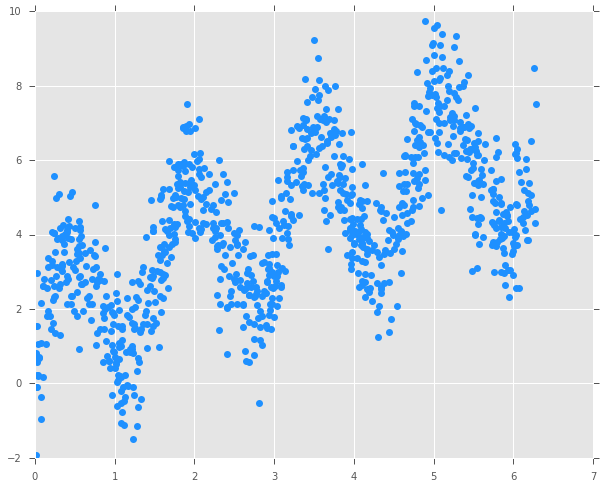

In [326]:
#  Generating data
tau=2*np.pi
np.random.seed(29)
N = 1000
X = np.random.random((N,1))*tau
yy = np.sin(4*X)*2+2.5*np.sqrt(X)+np.random.normal(0,1.0,(N,1))

y=yy.ravel()

plt.plot(X, y, linestyle='None',color='#1E90FF',marker='o',fillstyle='full',markeredgecolor ='#1E90FF',label='original data with noise')


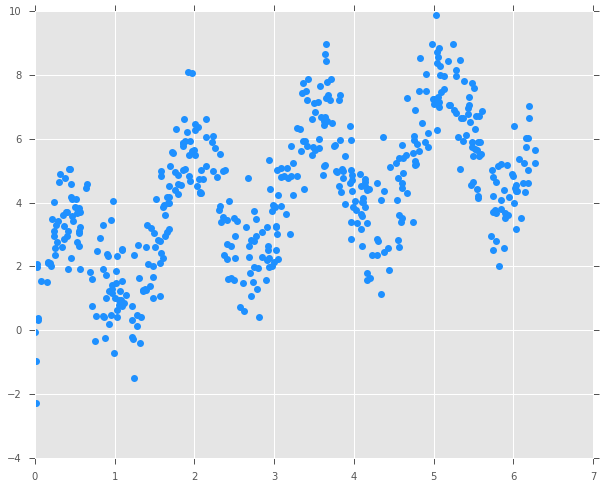

In [296]:
tau=2*np.pi
np.random.seed(29)
N = 500
X = np.random.random((N,1))*tau
#
yy = np.sin(4*X)*2+2.5*np.sqrt(X)+np.random.normal(0,1.0,(N,1))

y=yy.ravel()
X=np.ravel(X)

#X,y
plt.plot(X, y, linestyle='None',color='#1E90FF',marker='o',fillstyle='full',markeredgecolor ='#1E90FF',label='original data with noise')



array([[ 0.81146875,  0.9175318 ,  0.77065037,  0.88496394,  0.54182628,
         0.46819998,  0.76361872,  0.30422417,  0.11155648,  0.04050184]])

In [290]:
dat={'X':X,'y':y}
df =pd.DataFrame(dat)
df.head()

,X,y
0,5.427164,6.980560
1,1.790117,4.581800
2,0.460283,3.575769
3,4.795561,5.839347
4,2.844518,2.300084


In [ ]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

sns.pairplot(df)

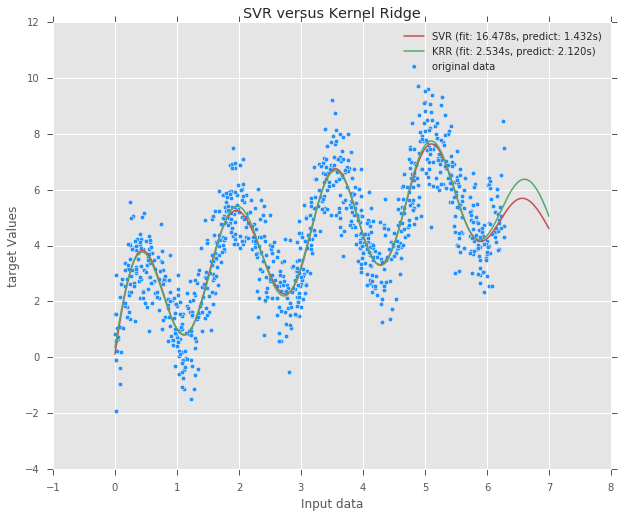

In [327]:
from __future__ import division
import time

import numpy as np

from sklearn.svm import SVR
from sklearn.grid_search import GridSearchCV
from sklearn.learning_curve import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

#############################################################################
#
#rng = np.random.RandomState(0)
#tau=2*np.pi
#np.random.seed(29)
#N = 1000
#X = np.random.random((N,1))*tau

#yy = np.sin(4*X)*2+2.5*np.sqrt(X)+np.random.normal(0,1.0,(N,1))
#y=yy.ravel()

X_plot = np.linspace(0, 7, N+500)[:, None]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#############################################################################
# Fit regression model

svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})

svr.fit(X_train, y_train)

kr.fit(X_train, y_train)

y_svr = svr.predict(X_plot)

y_kr = kr.predict(X_plot)
#############################################################################
# look at the results
plt.scatter(X, y, c='#1E90FF', label='original data')
plt.hold('on')
plt.plot(X_plot, y_svr,lw=1.5, c='r',
         label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
plt.plot(X_plot, y_kr,lw=1.5, c='g',
         label='KRR (fit: %.3fs, predict: %.3fs)' % (kr_fit, kr_predict))
plt.xlabel('Input data')
plt.ylabel('target Values')
plt.title('SVR versus Kernel Ridge')
plt.legend()

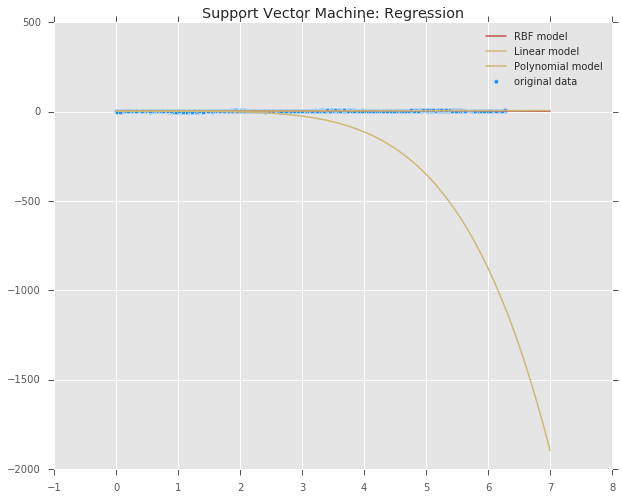

In [321]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=3)
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_plot)
y_lin = svr_lin.fit(X_train, y_train).predict(X_plot)
y_poly = svr_poly.fit(X_train, y_train).predict(X_plot)

#Results
plt.scatter(X, y, c='#1E90FF', label='original data')
plt.plot(X_plot, y_rbf,lw=1.5, c='r',label='RBF model')
plt.plot(X_plot, y_lin,lw=1.5, c='y',label='Linear model')
plt.plot(X_plot, y_poly,lw=1.5, c='y',label='Polynomial model')

plt.title('Support Vector Machine: Regression')
plt.legend()

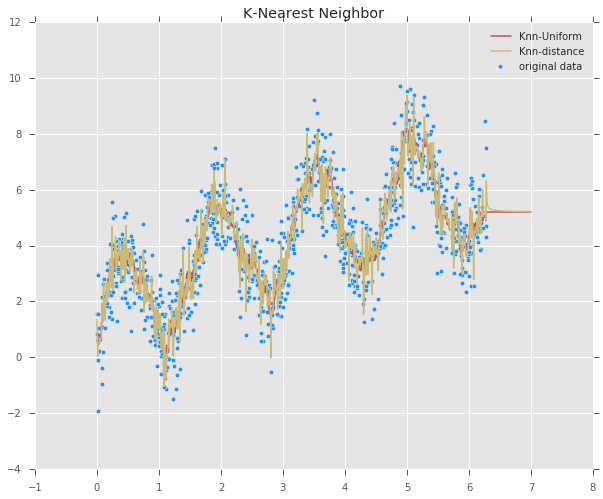

In [311]:
from sklearn import neighbors
n_neighbors = 10
knnu = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')
knnd = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')
y_p = knnu.fit(X_train, y_train).predict(X_plot)
y_pd = knnd.fit(X_train, y_train).predict(X_plot)

plt.scatter(X, y, c='#1E90FF', label='original data')
plt.plot(X_plot, y_p,lw=1.5, c='r',label='Knn-Uniform')
plt.plot(X_plot, y_pd,lw=1.5, c='y',label='Knn-distance')

plt.title('K-Nearest Neighbor')
plt.legend()

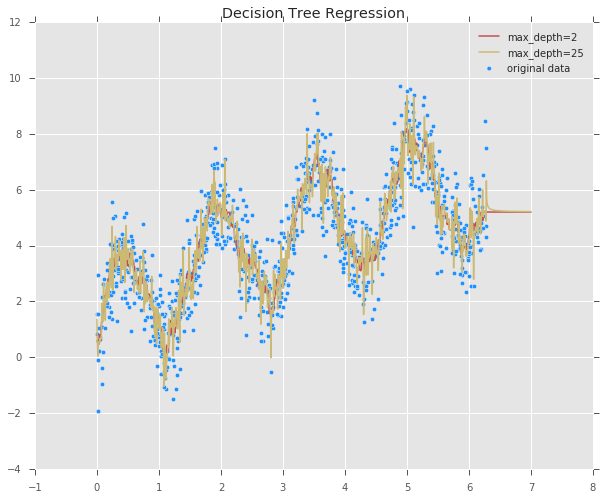

In [313]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
dctr_dp2 = DecisionTreeRegressor(max_depth=2)
dctr_dp5 = DecisionTreeRegressor(max_depth=5)
dctr_dp2.fit(X_train, y_train)
dctr_dp5.fit(X_train, y_train)

# Predict
y_dp2 = dctr_dp2.predict(X_plot)
y_dp5 = dctr_dp5.predict(X_plot)

# Plot the results
plt.scatter(X, y, c='#1E90FF', label='original data')
plt.plot(X_plot, y_p,lw=1.5, c='r',label='max_depth=2')
plt.plot(X_plot, y_pd,lw=1.5, c='y',label='max_depth=25')
plt.title("Decision Tree Regression")
plt.legend()


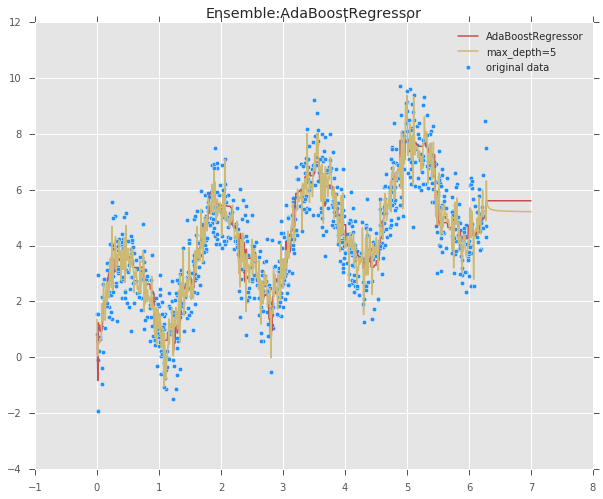

In [318]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
rng = np.random.RandomState(1)
dctr_ad = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),
                          n_estimators=300, random_state=rng)
dctr_dp5 = DecisionTreeRegressor(max_depth=5)
dctr_ad.fit(X_train, y_train)
dctr_dp5.fit(X_train, y_train)

# Predict
y_ad = dctr_ad.predict(X_plot)
y_dp5 = dctr_dp5.predict(X_plot)

# Plot the results
plt.scatter(X, y, c='#1E90FF', label='original data')
plt.plot(X_plot, y_ad,lw=1.5, c='r',label='AdaBoostRegressor')
plt.plot(X_plot, y_pd,lw=1.5, c='y',label='max_depth=5')
plt.title("Ensemble:AdaBoostRegressor")
plt.legend()


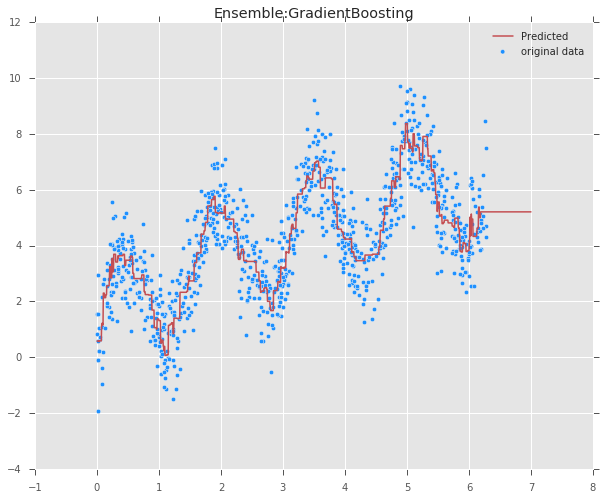

In [315]:
from sklearn.ensemble import GradientBoostingRegressor
alpha = 0.95

clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)
clf.set_params(loss='ls')
clf.fit(X_train, y_train)


# Make the prediction on the meshed x-axis
y_p = clf.predict(X_plot)

# Plot the results
plt.scatter(X, y, c='#1E90FF', label='original data')
plt.plot(X_plot, y_p,lw=1.5, c='r',label='Predicted')

plt.title("Ensemble:GradientBoosting")
plt.legend()

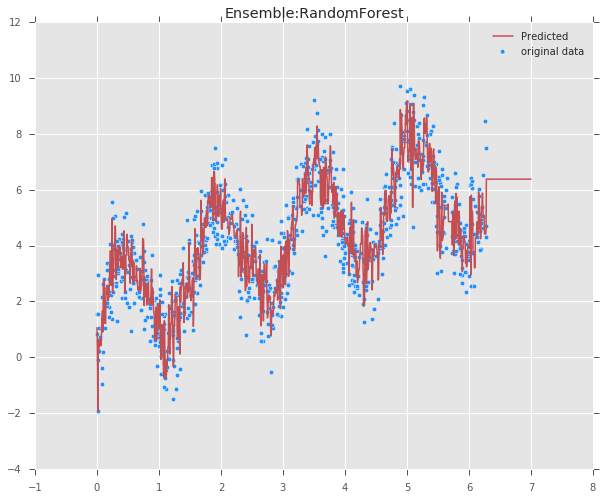

In [320]:
from sklearn.ensemble import RandomForestRegressor
max_depth = 30
regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)
# Predict on new data
y_rf = regr_rf.predict(X_plot)

# Plot the results
plt.scatter(X, y, c='#1E90FF', label='original data')
plt.plot(X_plot, y_rf,lw=1.5, c='r',label='Predicted')

plt.title("Ensemble:RandomForest")
plt.legend()

In [322]:
from patsy import dmatrices
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.discrete.discrete_model as sm

## read in the data & create matrices
df = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [353]:
from pandas.tools.plotting import radviz
#radviz(df)

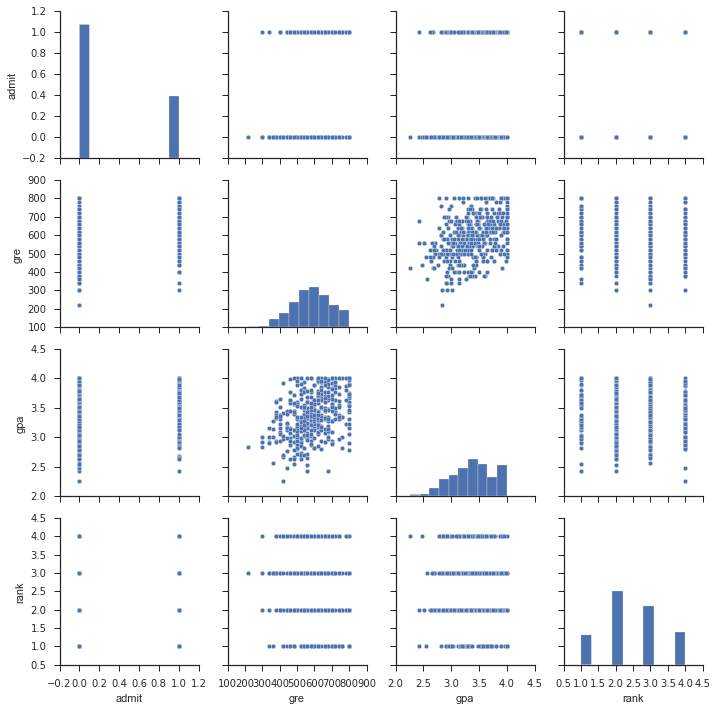

In [323]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

sns.pairplot(df)

In [324]:
y, X = dmatrices('admit ~ gre + gpa + C(rank)', df, return_type = 'dataframe')
# sklearn output
model = LogisticRegression(fit_intercept = False, C = 1e9)
mdl = model.fit(X, y)
model.coef_

# sm
logit = sm.Logit(y, X)
logit.fit().params

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


/Users/moshiour/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept      -3.989979
C(rank)[T.2]   -0.675443
C(rank)[T.3]   -1.340204
C(rank)[T.4]   -1.551464
gre             0.002264
gpa             0.804038
dtype: float64

Train on 720 samples, validate on 80 samples
Epoch 1/6500
720/720 [==============================] - 0s - loss: 6.6962 - val_loss: 2.6858
Epoch 2/6500
720/720 [==============================] - 0s - loss: 2.9738 - val_loss: 2.8005
Epoch 3/6500
720/720 [==============================] - 0s - loss: 2.9176 - val_loss: 2.8503
Epoch 4/6500
720/720 [==============================] - 0s - loss: 2.8907 - val_loss: 2.7971
Epoch 5/6500
720/720 [==============================] - 0s - loss: 2.8664 - val_loss: 2.8553
Epoch 6/6500
720/720 [==============================] - 0s - loss: 2.8504 - val_loss: 2.7603
Epoch 7/6500
720/720 [==============================] - 0s - loss: 2.8435 - val_loss: 2.8017
Epoch 8/6500
720/720 [==============================] - 0s - loss: 2.8343 - val_loss: 2.7698
Epoch 9/6500
720/720 [==============================] - 0s - loss: 2.8337 - val_loss: 2.7965
Epoch 10/6500
720/720 [==============================] - 0s - loss: 2.8422 - val_loss: 2.7642
Epoch 11/6500
720/720 [=

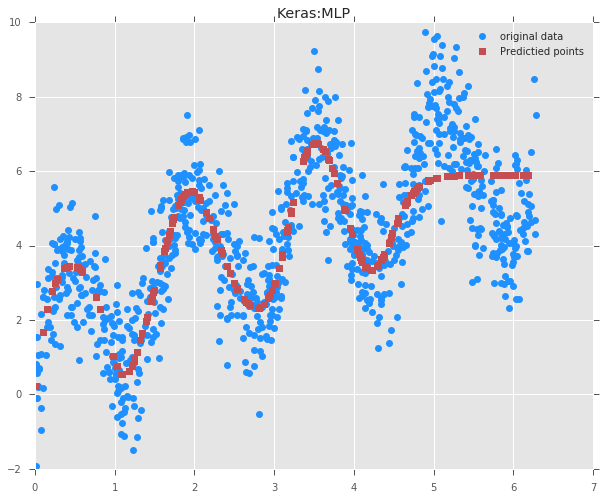

In [344]:
#Keras MLP

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

from sklearn.metrics import mean_squared_error

tau=2*np.pi

#  Generating data
## Generate X by uniformly sampling the interval [0,tau) 500 times
## Generate targets Y by 3 * sin(x) + 1 + e for error e
## error e defined by e ~ N(0,0.5) (drawn from normal with mean 0, std deviation 0.5

np.random.seed(29)
N = 1000
X = np.random.random((N,1))*tau
Y = np.sin(4*X)*2+2.5*np.sqrt(X)+np.random.normal(0,1.0,(N,1))


plt.plot(X, Y, linestyle='None',color='#1E90FF',marker='o',fillstyle='full',markeredgecolor ='#1E90FF',label='original data')

#  Splitting Data
I = np.arange(N)
np.random.shuffle(I)
n = 800

# Training sets
x_trn = X[I][:n]
y_trn = Y[I][:n]
## Testing sets
x_tst = X[I][n:]
y_tst = Y[I][n:]

# Multilayer Perceptron
model = Sequential()    # Feedforward
model.add(Dense(10, input_dim=1))
model.add(Activation('tanh'))
model.add(Dense(1))
model.compile(optimizer='SGD',loss='mse',metrics=['accuracy'])

model.fit(x_trn, y_trn, validation_split=0.1, nb_epoch=6500)
y_prd = model.predict(x_tst)
print("error:",mean_squared_error(t_tst, y_prd))
# Evaluate
loss, accuracy = model.evaluate(x_tst, y_tst, verbose=1)
print('loss: ', loss)
print('accuracy: ', accuracy)

plt.plot(xte, pred, linestyle='None',color='r',marker='s',fillstyle='full',markeredgecolor = 'r',label='Predictied points')
plt.title('Keras:MLP')
plt.legend()
